In [1]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd
from datetime import datetime

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('../Resources/2019_aus_ev_sales.csv')
#data = df.rename({"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)": "Price"}, axis=1)
#data['Date'] = pd.to_datetime(df['Date'])
#data = data.set_index('year')
data

,year,EV_PHEV,total_vehicles,EV%
0,2019,6718,1062867,0.600
1,2018,2216,1153111,0.200
2,2017,2287,1189116,0.190
3,2016,1369,1178133,0.120
4,2015,1771,1155408,0.150
5,2014,1322,1113224,0.120
6,2013,293,1136227,0.026
7,2012,253,1112030,0.023
8,2011,49,1008437,0.005


In [55]:
# Assign X (data) and y (target)

X = data['year'].values.reshape(-1, 1)
y = data['EV_PHEV'].values.reshape(-1, 1)
print(X.shape, y.shape)


(9, 1) (9, 1)


In [56]:
# Setting the training set to 80% of the data
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [57]:
# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,y_train)

In [58]:
predicted_sold_no = model.predict(X_test)
predicted_sold_no = pd.DataFrame(predicted_sold_no,index=y_test.index,columns = ['EV_PHEV'])
predicted_sold_no.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Sold Number','Actual Sold Number'])
plt.ylabel("Number of Electric Vehicles Sold")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [59]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

MSE = mean_squared_error(y_test, predicted_sold_no)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

ValueError: Found input variables with inconsistent numbers of samples: [3, 2]

In [61]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [62]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [63]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

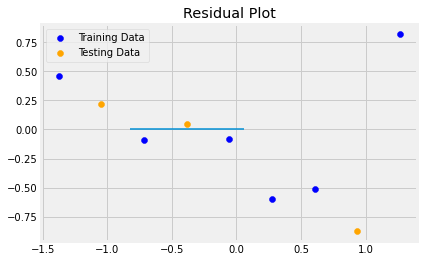

In [64]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

([<matplotlib.axis.XTick at 0x7fab10ee2190>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

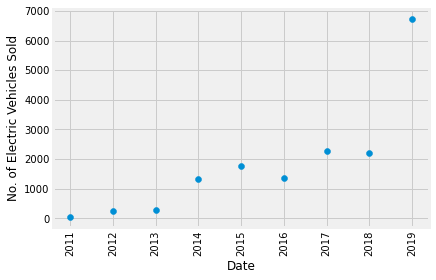

In [65]:
plt.scatter(X, y)
plt.xlabel("Date")
plt.ylabel("No. of Electric Vehicles Sold")
plt.xticks(X, rotation='vertical')

In [66]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2735374745546581, R2: -1.0866747586585146


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

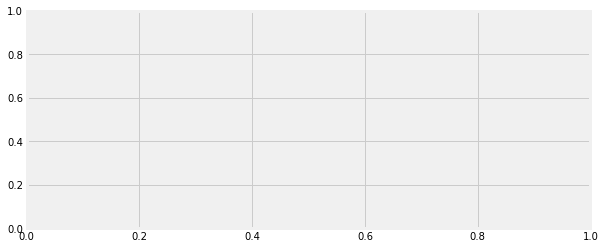

In [74]:
fig, ax=plt.subplots(figsize=(9, 4))
y_train_scaled['No. of Electric Vehicles Sold'].plot(ax=ax, label='train')
y_test_scaled['No. of Electric Vehicles Sold'].plot(ax=ax, label='test')
ax.legend()